# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!pip install np_utils
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler 
import math
from tensorflow.keras.callbacks import LearningRateScheduler

In [4]:
from tensorflow.keras.optimizers import SGD

In [5]:
data=pd.read_csv("ionosphere_data.csv")

In [6]:
data.shape

(351, 35)

In [7]:
data.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [8]:
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

### Encoder

In [9]:
encoder = LabelEncoder() 
encoder.fit(data.label) 
data.label= encoder.transform(data.label)
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


### Normalized Data

In [10]:
min_d = data.min()
max_d = data.max()
normalized_df=(data - min_d)/(max_d - min_d)
normalized_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1.0,NaN,0.997695,0.470555,0.926215,0.511530,0.91699,0.311460,1.000000,0.518800,...,0.244145,0.705390,0.269160,0.606330,0.329550,0.711335,0.227565,0.593205,0.273500,1.0
1,1.0,NaN,1.000000,0.405855,0.965175,0.319220,0.44566,0.032015,1.000000,0.477255,...,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765,0.0
2,1.0,NaN,1.000000,0.483175,1.000000,0.502425,1.00000,0.439690,0.944825,0.505990,...,0.298900,0.794920,0.389275,0.715500,0.413175,0.802180,0.379100,0.780225,0.308810,1.0
3,1.0,NaN,1.000000,0.274195,1.000000,1.000000,0.85608,0.000000,0.500000,0.500000,...,0.953475,0.758065,1.000000,1.000000,0.399505,0.628410,1.000000,0.338090,1.000000,0.0
4,1.0,NaN,1.000000,0.487995,0.970700,0.532655,0.96053,0.383725,0.885760,0.418005,...,0.174210,0.566450,0.233970,0.512155,0.189015,0.471465,0.202135,0.476960,0.171515,1.0


In [11]:
normalized_df.isnull().sum()

feature1       0
feature2     351
feature3       0
feature4       0
feature5       0
feature6       0
feature7       0
feature8       0
feature9       0
feature10      0
feature11      0
feature12      0
feature13      0
feature14      0
feature15      0
feature16      0
feature17      0
feature18      0
feature19      0
feature20      0
feature21      0
feature22      0
feature23      0
feature24      0
feature25      0
feature26      0
feature27      0
feature28      0
feature29      0
feature30      0
feature31      0
feature32      0
feature33      0
feature34      0
label          0
dtype: int64

In [12]:
normalized_df=normalized_df.drop(["feature2"],axis=1)

In [13]:
X=normalized_df.iloc[:,:-1].values

In [14]:
y=normalized_df.iloc[:,-1].values

In [15]:
X.shape

(351, 33)

## Manually splitting data

In [16]:
train_data=X[:210]
train_targets=y[:210]
train_targets=np.asarray(train_targets)


print(train_data.shape)

test_data=X[210:]
test_targets=y[210:]
test_targets=np.asarray(test_targets)


print(test_data.shape)
print(test_targets[1])

(210, 33)
(141, 33)
1.0


In [17]:
model = Sequential() 
model.add(Dense(16, input_dim=33, activation= "relu" )) 
model.add(Dense(1, activation= "sigmoid" )) 
# Compile model     
learning_rate = 0.1 
decay_rate = learning_rate / 100 
momentum = 0.8 
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= "binary_crossentropy" , optimizer=sgd, metrics=[ "accuracy" ])
his=model.fit(X, y, epochs=100, batch_size=28, verbose=2)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
351/351 - 0s - loss: 0.6364 - acc: 0.6667
Epoch 2/100
351/351 - 0s - loss: 0.5261 - acc: 0.7749
Epoch 3/100
351/351 - 0s - loss: 0.5115 - acc: 0.7550
Epoch 4/100
351/351 - 0s - loss: 0.4476 - acc: 0.8291
Epoch 5/100
351/351 - 0s - loss: 0.3771 - acc: 0.8632
Epoch 6/100
351/351 - 0s - loss: 0.3441 - acc: 0.8832
Epoch 7/100
351/351 - 0s - loss: 0.3006 - acc: 0.9003
Epoch 8/100
351/351 - 0s - loss: 0.4513 - acc: 0.7920
Epoch 9/100
351/351 - 0s - loss: 0.3507 - acc: 0.8775
Epoch 10/100
351/351 - 0s - loss: 0.3275 - acc: 0.8718
Epoch 11/100
351/351 - 0s - loss: 0.2662 - acc: 0.9088
Epoch 12/100
351/351 - 0s - loss: 0.2505 - acc: 0.9031
Epoch 13/100
351/351 - 0s - loss: 0.2325 - acc: 0.9345
Epoch 14/100
351/351 - 0s - loss: 0.2706 - acc: 0.9003
Epoch 15/100
351/351 - 0s -

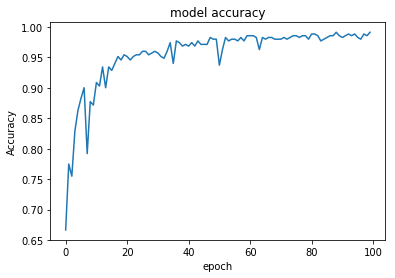

In [18]:
from matplotlib import pyplot as plt
plt.plot(his.history['acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

### Evaluate

In [19]:
model.evaluate(test_data,test_targets)

141/141 [==============================] - 0s 284us/sample - loss: 0.0259 - acc: 0.9929


[0.025921660191412513, 0.9929078]

### Prediction

In [20]:
pred=model.predict(test_data)
pred[1]

array([0.9765401], dtype=float32)

In [21]:
test_targets[1]

1.0